In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold

In [7]:
np.random.seed(0)

In [9]:
dog_ear_flappiness_index=np.random.normal(loc=8,scale=1,size=10)
dog_whisker_length=np.random.normal(loc=5,scale=1,size=10)

In [11]:
cat_ear_flappiness_index=np.random.normal(loc=5,scale=1,size=10)
cat_whisker_length=np.random.normal(loc=8,scale=1,size=10)

In [13]:
dogs_data=np.vstack((dog_ear_flappiness_index,dog_whisker_length)).T
cats_data=np.vstack((cat_ear_flappiness_index,cat_whisker_length)).T
data=np.vstack((dogs_data,cats_data))
labels=np.hstack((np.zeros(len(dogs_data)),np.ones(len(cats_data))))
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [15]:
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=42)
y_train

array([0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.])

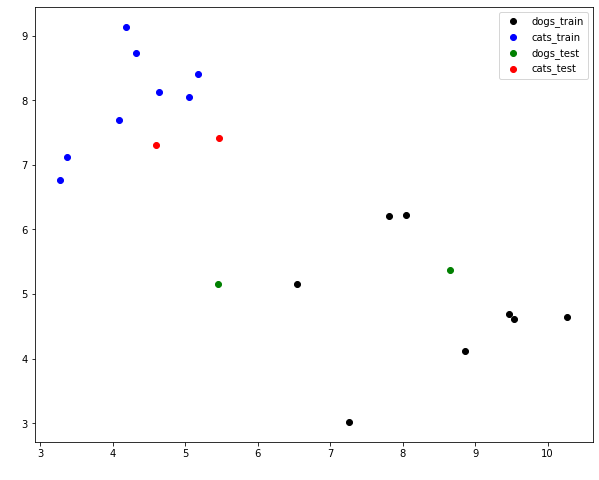

In [17]:
dogs_train=x_train[y_train==0]
cats_train=x_train[y_train==1]
cats_test=x_test[y_test==1]
dogs_test=x_test[y_test==0]

plt.figure(figsize=(10,8))
plt.scatter(dogs_train[:,0],dogs_train[:,1],color="BLACK",label="dogs_train")
plt.scatter(cats_train[:,0],cats_train[:,1],color="blue",label="cats_train")
plt.scatter(dogs_test[:,0],dogs_test[:,1],color= "GREEN",marker="o",label="dogs_test")
plt.scatter(cats_test[:,0],cats_test[:,1],  color="RED" ,marker="o",label="cats_test")
plt.xlabel("Whisker Length",color="white")
plt.ylabel("Ear Flappiness Index",color="white")
plt.legend()
plt.show()

In [19]:
def random_linear_classifier(dogs_data,cats_data,k,d):
    best_error=float('inf')
    best_theta=None
    best_theta_not=None 

    for _ in range(k):
     theta=np.random.normal(size=d)
     theta_not=np.random.normal()
     error=compute_error(theta,theta_not,dogs_data,cats_data)
     if(error<best_error):
      best_error=error
      best_theta=theta
      best_theta_not=theta_not

    return best_theta,best_theta_not,best_error



In [21]:
def compute_error(theta,theta_not,dogs_data,cats_data):
    error=0
    for x in dogs_data:
        if np.dot(theta,x)+theta_not<=0:
            error+=1
    for y in cats_data:
        if np.dot(theta,y)+theta_not>0:
            error+=1
    return error

In [ ]:
def cross_validation(data_dogs,data_cats,k_values,n_splits=5):
    kf=KFold(n_splits=n_splits,shuffle=True,random_state=42)
    avg_errors=[]

    for k in k_values:
        errors=[]


        for train_index,val_index in kf.split(data_dogs):
            x_train_fold=np.vstack(data_dogs[train_index],data_cats[train_index])
            y_train_fold=np.hstack((np.zeros(len(train_index)),np.ones(len(train_index))))
            x_val_fold=np.vstack((data_dogs(val_index),data_cats[val_index]))
            y_val_fold=np.hstack((np.zeroes(len(val_index)),np.ones(len(val_index))))

            best_theta_fold,best_theta_not_fold,error=random_linear_classifier(x_train_fold[y_train_fold==0],x_train_fold[y_train_fold==1],k,d)

            errors.append(compute_error(x_val_fold[y_val_fold==0],x_val_fold[y_val_fold==1],best_theta_fold,best_theta_not_fold))


        avg.error.append(np.mean(errors))


    best_k=k_values[np.argmin(avg_errors)]
    return best_k